<a href="https://colab.research.google.com/github/noallynoclan/colab/blob/master/distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[colab](https://colab.research.google.com/drive/163C85NuF09HQWujN3IP22zahZhSsYLNI)

||replacements|w/o replacements|
|-|:-:|:-:|
|**Combinations**<br>(order does not matter)|$$\binom{k+n-1}{k}=\frac{(k+n-1)!}{k!(n-1)!}$$|$$\binom{n}{k}=\frac{n!}{k!(n-k)!}$$|
|**Permutations**<br>(order matters)|$$n^k$$|$$\frac{n!}{(n-k)!}$$|

||pars|&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; PMF/PDF &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;|mean|var|med|comments|
|-|:-:|:-:|:-:|:-:|:-:|:-:|
|**Bernoulli**|$$p$$|$$\begin{cases} P(X=0)=q=(1-p) \\ P(X=1)=p \end{cases}$$|$$p$$|$$p  (1-p)$$||boolean-valued outcome|
|**Grometric**|$$p$$|$$P(X=k)=(1-p)^{k-1}p$$|$$\frac{1}{p}$$|$$\frac{1-p}{p^2}$$||# of first success|
|**Binomial**|$$n, p$$|$$P(X=k)=\binom{n}{k}p^k(1-p)^{n-k}$$|$$np$$|$$np(1-p)$$||# successes drawn with replacement|
|**Poisson**|$$\lambda$$|$$P(X=k)=\frac{e^{-\lambda}\lambda^k}{k!}$$|$$\lambda$$|$$\lambda$$|| # emails/calls per time period|
|**Exponential**|$$\lambda$$|$$f(x \mid \lambda)=\lambda e^{-\lambda x}$$|$$\frac{1}{\lambda}$$|$$\frac{1}{\lambda^2}$$|$$\frac{\ln{2}}{\lambda}$$|time between events|
|**Normal**|$$\mu, \sigma^2$$|$$f(x \mid \mu, \sigma^2)=\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$|$$\mu$$|$$\sigma^2$$|$$\mu$$|measurement errors


||||comments|
|-:|:-:|:-:|:-:|
|**Law or Large Numbers**|$$\bar{X}_n \xrightarrow{\text{a.s.}} \mu$$||converges strongly<br>**almost surely**<br>**almost everywhere**<br>**with probability 1**|
|**Central Limit Theorem**|$$\bar{X}_n \xrightarrow{\text{d}} N\Bigl(\mu, \frac{\sigma^2}{n}\Bigr)$$|$$\sqrt{n}\frac{\bar{X}_n-\mu}{\sigma} \xrightarrow{\text{d}} N(0,1)$$|converges weakly<br>**in distribution**|

||$$\textbf{Pred NO}$$<br>$$\text{TN}+\text{FN}$$<br>$$P(\bar{B})$$|$$\textbf{Pred YES}$$<br>$$\text{FP}+\text{TP}$$<br>$$\text{Evidence}=P(B)$$|$$\text{ROC(th)}=\frac{\text{TPR(th)}}{\text{FPR(th)}}$$|
|:-:|:-:|:-:|:-:|
|$$\textbf{Actual NO}$$<BR>$$\text{TN}+\text{FP}$$<BR>$$P(\bar{A})$$|$$\textbf{TN}$$<br>$$\text{Confidence}$$<BR>$$c=1-\alpha$$|$$\textbf{FP}$$<br>$$\text{Type I}$$<br>$$\alpha$$|$$\text{Fall out (FPR)}=\frac{\text{FP}}{\text{FP}+\text{TN}}$$|
|$$\textbf{Actual YES}$$<BR>$$\text{FN}+\text{TP}$$<br>$$\text{Prior}=P(A)$$|$$\textbf{FN}$$<br>$$\text{Type II}$$<br>$$\beta$$|$$\textbf{TP}$$<br>$$\text{Power}$$<br>$$p=1-\beta$$|$$\text{Recall (Sensitivity, TPR)}=\frac{\text{TP}}{\text{TP}+\text{FN}}$$<BR>$$\text{Likelihood}=P(B \mid A)$$|
||$$\text{Accuracy}=\frac{\text{TP}+\text{TN}}{\text{FP}+\text{FN}}$$|$$\text{Precision}=\frac{\text{TP}}{\text{TP}+\text{FP}}$$<br>$$P(A\mid B)=\frac{P(B \mid A) \cdot P(A)}{P(B)}$$<BR>$$\text{Posterior}=\frac{\text{Likelihood} \cdot \text{Prior}}{\text{Evidence}}$$|$$F_1=2\cdot\frac{\text{Precision}\cdot\text{Recall}}{\text{Precision}+\text{Recall}}$$|

||means|proportions|comments
|:-|:-:|:-:|:-:|
|$$x$$|$$n \times D(\mu, \sigma^2)$$|$$n \times \text{Bernouli}(p)$$||
|$$\mu$$|$$N\Bigl(\mu, \frac{\sigma^2}{n}\Bigr)$$|$$\frac{\text{Binomial}(n, p)}{n}$$||
|$$\textbf{SE}$$|$$\sqrt{\frac{\sigma^2_t}{n_t}+\frac{\sigma^2_c}{n_c}}$$|$$\sqrt{\hat{p}(1-\hat{p})\Bigl(\frac{1}{n_t}+\frac{1}{n_c}\Bigr)}$$||
|$$\Delta$$|$$\mu_t-\mu_c$$|$$p_t-p_c$$||
|$$z$$|$$\frac{\Delta}{\text{SE}} $$|$$\frac{\Delta}{\text{SE}} $$|$$\sim N\Bigl(\frac{\Delta}{\text{SE}}, 1\Bigr)$$|
|$$\textbf{CI}$$|$$\Delta \pm z_{\alpha/2}\cdot \text{SE}$$|$$\Delta \pm z_{\alpha/2} \cdot \text{SE}$$|`scipy.stats.norm.ppf`<br>Percent point function<br>Inverse CDF|
|$$\textbf{p_val}$$|$$2\cdot P(N \ge \lvert z\rvert)$$|$$2\cdot P(N \ge \lvert z\rvert)$$|`scipy.stats.norm.sf`<br>Survival function<br>1 – CDF|
|$$\textbf{MDE}$$|$$(z_{1-\alpha/2} + z_{1-\beta})\cdot \text{SE}$$|$$(z_{1-\alpha/2} + z_{1-\beta})\cdot \text{SE}$$|$$\Delta$$|
|$$n$$|$$\frac{\sigma^2_t(1-t)+\sigma^2_ct}{t(1-t)}\cdot \Bigl(\frac{z_{1-\alpha/2} + z_{1-\beta}}{\Delta}\Bigr)^2$$|$$\frac{\hat{p}(1-\hat{p})}{t(1-t)}\cdot \Bigl(\frac{z_{1-\alpha/2} + z_{1-\beta}}{\Delta}\Bigr)^2$$|$$(z_{1-\alpha/2} + z_{1-\beta})\cdot \text{SE} \le \Delta$$|


,nt,nc,mt,mc,st,sc,se,z,pval,ci
0,7079,28315,0.101709,0.102278,0.091365,0.091817,0.004025,-0.141298,0.887634,=


ci,sig,<,=,>
0,False,0,89911,0
1,True,5019,0,5070


,nt,nc,mt,mc,st,sc,se,z,pval,ci
0,7079,28315,0.109903,0.095391,0.097824,0.086292,0.003956,3.66812,0.000244,>


ci,sig,=,>
0,False,20531,0
1,True,0,79469


[[89911 10089]
 [20531 79469]]


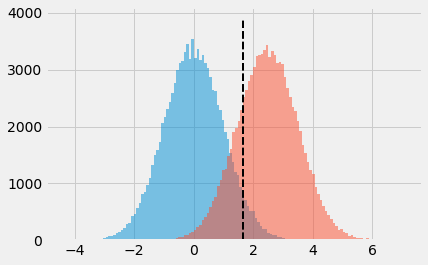

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt, numpy as np, pandas as pd
from IPython.display import display
from scipy.stats import norm

plt.style.use('fivethirtyeight')


def n_prop(pt, pc, t, conf, power):
    p = pt * t + pc * (1 - t)
    n = p * (1 - p) / t / (1 - t) * (norm.ppf([1 - (1 - conf) / 2, power]).sum() / (pt - pc)) ** 2
    return np.ceil([n * t, n * (1 - t)]).astype(int)


def gen_prop(p, n_samples, n_exp):
    return np.random.binomial(n_samples, p, n_exp) / n_samples


def disp(nt, nc, mt, mc, st, sc, se, z, pval, conf):
    df = pd.DataFrame({'nt': nt, 'nc': nc, 'mt': mt, 'mc': mc, 'st': st, 'sc': sc,
                       'se': se, 'z': z, 'pval': pval, 'ci': '='})
    df.loc[mt - mc + se * norm.ppf(1 - (1 - conf) / 2) < 0, 'ci'] = '<'
    df.loc[mt - mc + se * norm.ppf((1 - conf) / 2) > 0, 'ci'] = '>'
    display(df.head(1))
    display(df.pivot_table('pval', pd.Series(pval < 1 - conf).rename('sig'), 'ci', 'count', 0).reset_index())


def ttest(delta, se, conf):
    z = delta / se
    pval = norm.sf(np.abs(z)) * 2
    ax = pd.Series(z).hist(bins=100, alpha=0.5)
    plt.vlines(norm.ppf(1 - (1 - conf) / 2), *ax.get_ylim(), ls='--', lw=2)
    return z, pval


def prop_test(pt, pc, nt, nc, conf, n_exp):
    pt, pc = gen_prop(pt, nt, n_exp), gen_prop(pc, nc, n_exp)
    p = (pt * nt + pc * nc) / (nt + nc)
    se = np.sqrt(p * (1 - p) * (1 / nt + 1 / nc))
    z, pval = ttest(pt - pc, se, conf)
    disp(nt, nc, pt, pc, pt * (1 - pt), pc * (1 - pc), se, z, pval, conf)
    return (pval > 1 - conf).sum(), (pval < 1 - conf).sum()


def run_prop_tests(pt, pc, t, conf=0.9, power=0.8, n_exp=100_000):
    nt, nc = n_prop(pt, pc, t, conf, power)
    print(np.array([prop_test(pc, pc, nt, nc, conf, n_exp),
                    prop_test(pt, pc, nt, nc, conf, n_exp)]))


run_prop_tests(pt=0.11, pc=0.1, t=0.2)

,nt,nc,mt,mc,st,sc,se,z,pval,ci
0,2577,3865,100.184431,100.127009,5.01607,4.982428,0.127227,0.45133,0.651751,=


ci,sig,<,=,>
0,False,0,8934,0
1,True,543,0,523


,nt,nc,mt,mc,st,sc,se,z,pval,ci
0,2577,3865,100.932683,99.967313,20.031632,4.969864,0.402618,2.397733,0.016497,>


ci,sig,=,>
0,False,1994,0
1,True,0,8006


[[8934 1066]
 [1994 8006]]


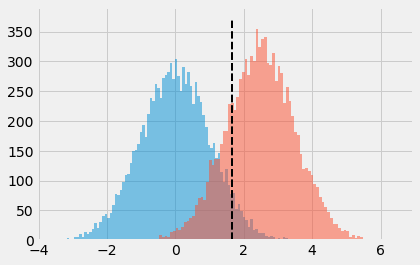

In [0]:
def n_mean(mt, mc, st, sc, t, conf, power):
    n = (st ** 2 * (1 - t) + sc ** 2 * t) / t / (1 - t) * (norm.ppf([1 - (1 - conf) / 2, power]).sum() / (mt - mc)) ** 2
    return np.ceil([n * t, n * (1 - t)]).astype(int)


def gen_mean(mu, std, n_samples, n_exp):
    x = np.random.normal(mu, std, (n_exp, n_samples))
    return x.mean(axis=1), x.std(axis=1)


def mean_test(mt, mc, st, sc, nt, nc, conf, n_exp):
    (mt, st), (mc, sc) = gen_mean(mt, st, nt, n_exp), gen_mean(mc, sc, nc, n_exp)
    se = np.sqrt(st ** 2 / nt + sc ** 2 / nc)
    z, pval = ttest(mt - mc, se, conf)
    disp(nt, nc, mt, mc, st, sc, se, z, pval, conf)
    return (pval > 1 - conf).sum(), (pval < 1 - conf).sum()


def run_mean_tests(mt, mc, st, sc, t, conf=0.9, power=0.8, n_exp=10_000):
    nt, nc = n_mean(mt, mc, st, sc, t, conf, power)
    print(np.array([mean_test(mc, mc, sc, sc, nt, nc, conf, n_exp),
                    mean_test(mt, mc, st, sc, nt, nc, conf, n_exp)]))


run_mean_tests(mt=101, mc=100, st=20, sc=5, t=0.4)